In [36]:
import pandas as pd
import urllib2
import json
import io
import os
import networkx as nx
import re
import matplotlib.pyplot as plt
import numpy as np
from fa2 import ForceAtlas2
import mwparserfromhell
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import random

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('data', 'character.csv'))

In [3]:
df.head()

,Unnamed: 0,page_id,title,House
0,0,4982,Template:Gryffindor individual infobox,Gryffindors
1,1,33349,Astrix Alixan,Gryffindors
2,2,33353,Filemina Alchin,Gryffindors
3,3,7018,Euan Abercrombie,Gryffindors
4,4,99282,Sakura Akagi,Gryffindors


In [4]:
basequery = 'http://harrypotter.wikia.com/api.php?action=query&format=json&prop=revisions&rvprop=content'

def create_query(pageid):
    return basequery+'&pageids='+str(pageid)

In [5]:
def format_filename(name):
    return os.path.join('data/%s.json') % (name)

def dump_file(name, data):
    file_name = format_filename(name)
    with io.open(file_name, "w", encoding="utf-8") as f:
        f.write(unicode(json.dumps(data, ensure_ascii=False)))
    print("Wrote file: %s" % (file_name))

In [10]:
for pageid in df['page_id']:
    query = create_query(pageid)
    response =  urllib2.urlopen(query)
    response_dict = json.loads(response.read())
    for k in response_dict['query']['pages'].keys():
        dump_file(pageid, response_dict['query']['pages'][k]['revisions'][-1]['*'])

Wrote file: data/4982.json
Wrote file: data/33349.json
Wrote file: data/33353.json
Wrote file: data/7018.json
Wrote file: data/99282.json
Wrote file: data/99036.json
Wrote file: data/123475.json
Wrote file: data/59171.json
Wrote file: data/59173.json
Wrote file: data/59193.json
Wrote file: data/59177.json
Wrote file: data/28767.json
Wrote file: data/33354.json
Wrote file: data/98807.json
Wrote file: data/99269.json
Wrote file: data/33408.json
Wrote file: data/325.json
Wrote file: data/99052.json
Wrote file: data/8259.json
Wrote file: data/99277.json
Wrote file: data/197956.json
Wrote file: data/197957.json
Wrote file: data/36003.json
Wrote file: data/31.json
Wrote file: data/197958.json
Wrote file: data/37634.json
Wrote file: data/46445.json
Wrote file: data/137536.json
Wrote file: data/46451.json
Wrote file: data/99236.json
Wrote file: data/20.json
Wrote file: data/890.json
Wrote file: data/161113.json
Wrote file: data/98813.json
Wrote file: data/192662.json
Wrote file: data/197960.js

Wrote file: data/208585.json
Wrote file: data/205930.json
Wrote file: data/35207.json
Wrote file: data/7035.json
Wrote file: data/96953.json
Wrote file: data/96954.json
Wrote file: data/46384.json
Wrote file: data/90770.json
Wrote file: data/410.json
Wrote file: data/99637.json
Wrote file: data/100468.json
Wrote file: data/45810.json
Wrote file: data/185195.json
Wrote file: data/7034.json
Wrote file: data/947.json
Wrote file: data/34875.json
Wrote file: data/99618.json
Wrote file: data/99619.json
Wrote file: data/38278.json
Wrote file: data/6874.json
Wrote file: data/34737.json
Wrote file: data/4483.json
Wrote file: data/5092.json
Wrote file: data/7039.json
Wrote file: data/328.json
Wrote file: data/7030.json
Wrote file: data/100481.json
Wrote file: data/89466.json
Wrote file: data/34449.json
Wrote file: data/99620.json
Wrote file: data/2836.json
Wrote file: data/99621.json
Wrote file: data/99622.json
Wrote file: data/39000.json
Wrote file: data/119219.json
Wrote file: data/100482.json

Wrote file: data/83.json
Wrote file: data/2762.json
Wrote file: data/36334.json
Wrote file: data/865.json
Wrote file: data/36.json
Wrote file: data/6310.json
Wrote file: data/192663.json
Wrote file: data/82797.json
Wrote file: data/161921.json
Wrote file: data/161975.json
Wrote file: data/100502.json
Wrote file: data/35220.json
Wrote file: data/35967.json
Wrote file: data/679.json
Wrote file: data/14699.json
Wrote file: data/18212.json
Wrote file: data/18211.json
Wrote file: data/34879.json
Wrote file: data/34891.json
Wrote file: data/547.json
Wrote file: data/44396.json
Wrote file: data/34860.json
Wrote file: data/44389.json
Wrote file: data/198022.json
Wrote file: data/100531.json
Wrote file: data/126518.json
Wrote file: data/7055.json
Wrote file: data/34865.json
Wrote file: data/3389.json
Wrote file: data/42332.json
Wrote file: data/35115.json
Wrote file: data/96195.json
Wrote file: data/77774.json
Wrote file: data/77775.json
Wrote file: data/35154.json
Wrote file: data/118961.json


In [6]:
regex = "\[\[(.*?)\]\]"

character_name = np.array(df.title)

G = nx.DiGraph()
for index, row in df.iterrows():
    G.add_node(row['title'], house=row['House'], pageid=row['page_id'])

for index, row in df.iterrows():
    with io.open(format_filename(row['page_id']), 'r', encoding='utf-8') as f:
        content = json.load(f)
    links = re.findall(regex, content)
    
    for link in links:
        for l in link.split('|'): 
            if l in character_name:
                G.add_edge(row['title'], l)

In [7]:
print("Nodes: {}".format(len(G.nodes)))
print("Edges: {}".format(len(G.edges)))

Nodes: 855
Edges: 4584


In [8]:
def calculate_position(G):
    forceatlas2 = ForceAtlas2(scalingRatio=1.0,
                              strongGravityMode=False,
                              gravity=50.0,
                              verbose=False)
    return forceatlas2.forceatlas2_networkx_layout(nx.Graph(G), pos=None, iterations=3000)

In [9]:
house_color_dict = {
    'Gryffindors': '#740001',
    'Hufflepuffs': '#ecb939',
    'Slytherins': '#3d6b58',
    'Ravenclaws': '#222f5b',
    'Unknown_House': 'gray'
}

positions = calculate_position(G)
node_degree = [G.degree(n)*0.8+1 for n in G.nodes]
node_colors = [house_color_dict[v['house']] for k, v in G.nodes.data()]

In [74]:
# Add position, color and size as node attributes to dump it as GEXF file
for k, v in G.nodes(data=True):
    G.nodes[k]['x'] = positions[k][0]
    G.nodes[k]['y'] = positions[k][1]
    G.nodes[k]['color'] = house_color_dict[v['house']]
    G.nodes[k]['size'] = G.degree(k)*0.8+1

nx.write_gexf(G, os.path.join("resources", "graph.gexf"))

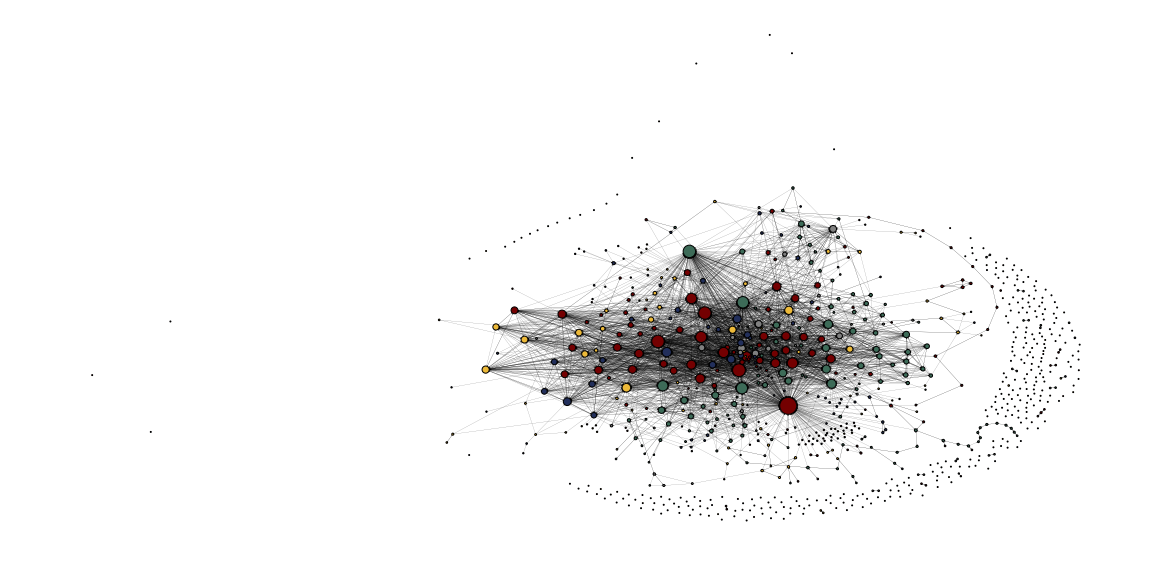

In [12]:
plt.figure(figsize=(20,10))
nx.draw_networkx(G, positions, 
                 cmap=plt.get_cmap('jet'), 
                 node_size=node_degree, 
                 node_color=node_colors, 
                 arrows = True,
                 width = 0.1,
                 with_labels=False,
                 linewidths=1., 
                 arrowsize=2)
plt.gca().collections[0].set_edgecolor("#000000")
plt.axis('off')
plt.savefig('fig.png')

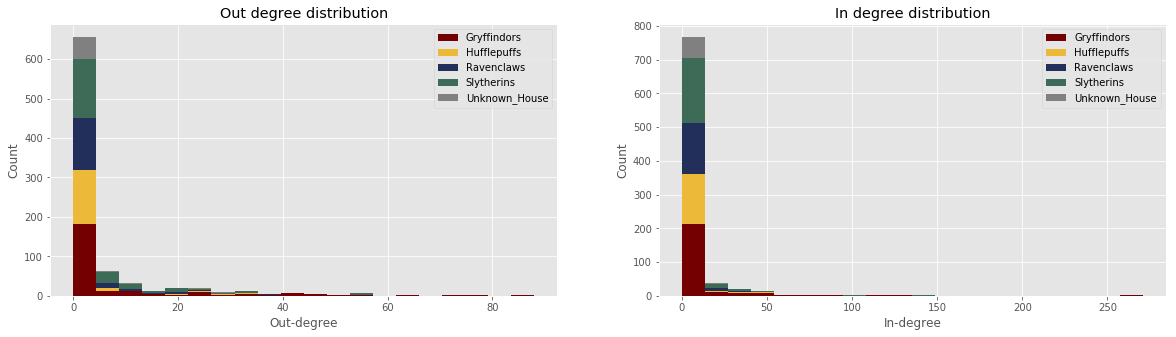

In [38]:
color_list = [v for h, v in house_color_dict.iteritems()]

in_degrees = [sorted([G.in_degree(k) for k, v in G.nodes.data() if v['house'] == h], reverse=True) \
              for h, _ in house_color_dict.iteritems()]
out_degrees = [sorted([G.out_degree(k) for k, v in G.nodes.data() if v['house'] == h], reverse=True) \
              for h, _ in house_color_dict.iteritems()]

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(out_degrees, bins = 20, stacked=True, color=color_list)
plt.title('Out degree distribution')
plt.xlabel('Out-degree')
plt.ylabel('Count')
plt.legend(house_color_dict)
plt.subplot(122)
plt.hist(in_degrees, bins = 20, stacked=True, color=color_list)
plt.title('In degree distribution')
plt.xlabel('In-degree')
plt.ylabel('Count')
plt.legend(house_color_dict)
plt.savefig('degree_dist.png')

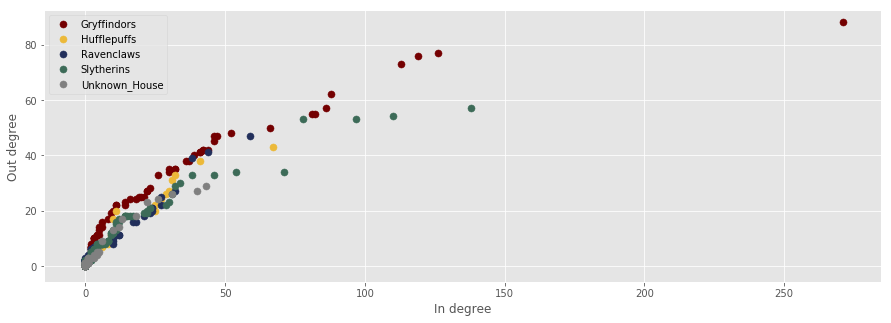

In [185]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
for i, c in enumerate(house_color_dict.itervalues()):
    scatter = ax.scatter(in_degrees[i], out_degrees[i], c=color_list[i],s=50)
plt.xlabel('In degree')
plt.ylabel('Out degree')
plt.legend(house_color_dict)
plt.savefig('degree_scatter.png')

Text(0.5,1,'In degree - log scale')

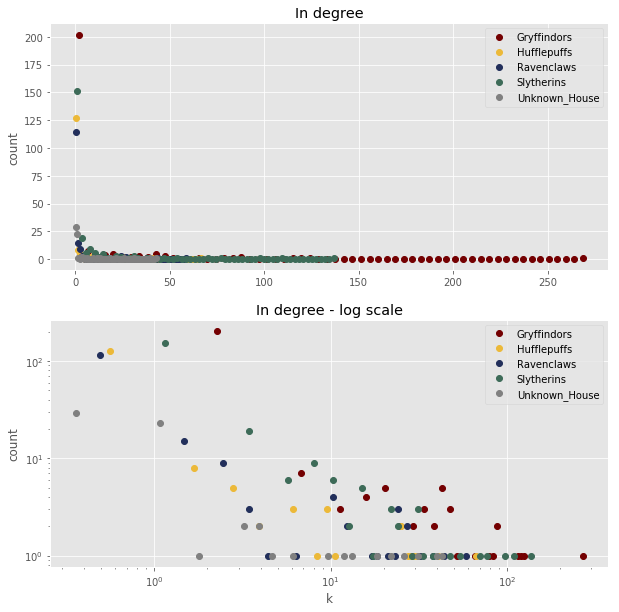

In [186]:
hists = [np.histogram(i, 60) for i in in_degrees]
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
for i, h in enumerate(hists):
    plt.plot(np.diff(h[1]) / 2 + h[1][:-1] , h[0], 'o', color=color_list[i])
plt.ylabel("count")
plt.title('In degree')
plt.legend(house_color_dict)
plt.subplot(2,1,2)
plt.xlabel("k")
plt.ylabel("count")
for i, h in enumerate(hists):
    plt.loglog(np.diff(h[1]) / 2 + h[1][:-1] , h[0], 'o', color=color_list[i])
plt.legend(house_color_dict)
plt.title('In degree - log scale')


Text(0.5,1,'Out degree - log scale')

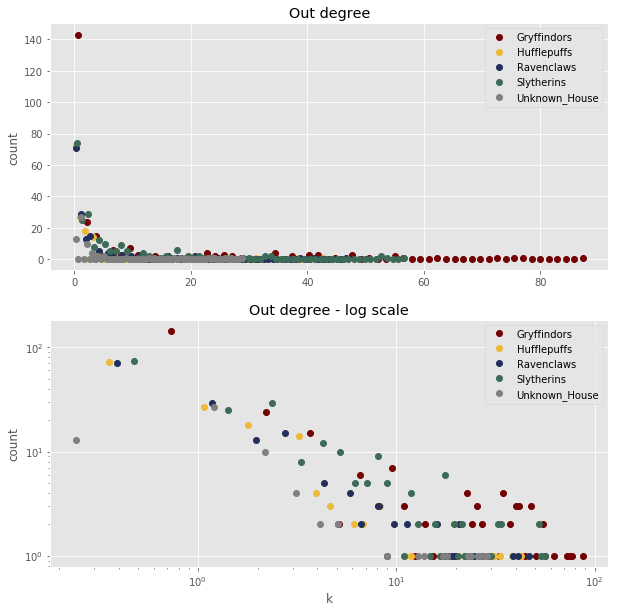

In [187]:
hists = [np.histogram(i, 60) for i in out_degrees]
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
for i, h in enumerate(hists):
    plt.plot(np.diff(h[1]) / 2 + h[1][:-1] , h[0], 'o', color=color_list[i])
plt.ylabel("count")
plt.title('Out degree')
plt.legend(house_color_dict)
plt.subplot(2,1,2)
plt.xlabel("k")
plt.ylabel("count")
for i, h in enumerate(hists):
    plt.loglog(np.diff(h[1]) / 2 + h[1][:-1] , h[0], 'o', color=color_list[i])
plt.legend(house_color_dict)
plt.title('Out degree - log scale')

## Community Detection
As many of the nodes don't have the edges, we remove those to be able to inspect the communities more closely.

In [17]:
import community

In [32]:
nd_G = nx.Graph(G)
# Remove nodes with no edges
nd_G.remove_nodes_from(list(nx.isolates(nd_G)))
partition = community.best_partition(nd_G)
print("The modularity of the partition is {}".format(community.modularity(partition, nd_G)))

The modularity of the partition is 0.318840059777


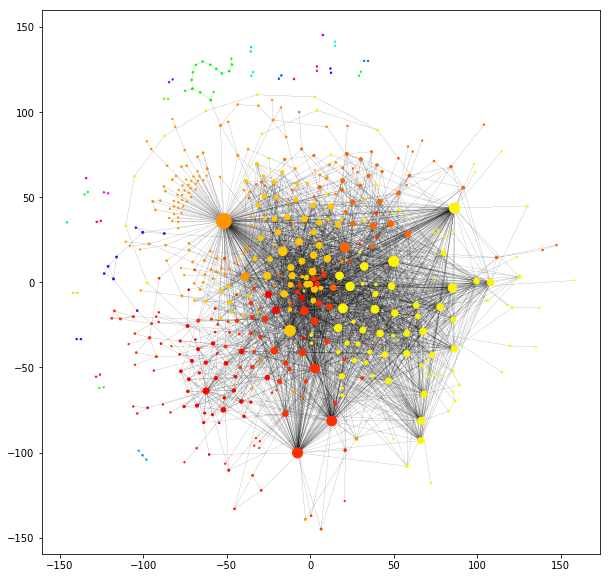

In [38]:
plt.figure(figsize=(10,10))
node_degree = [nd_G.degree(n)*0.8+1 for n in nd_G.nodes]
node_colors = [partition[n] for n in nd_G.nodes]
nx.draw_networkx(nd_G, positions,
                 cmap=plt.get_cmap('hsv'),
                 node_size=node_degree, 
                 node_color=node_colors, 
                 arrows = False,
                 width = 0.1,
                 with_labels=False)

In [103]:
# Add position, color and size as node attributes to dump it as GEXF file
for k, v in nd_G.nodes(data=True):
    nd_G.nodes[k]['x'] = positions[k][0]
    nd_G.nodes[k]['y'] = positions[k][1]
    c = colormap(partition[k]*30)
    nd_G.nodes[k]['color'] = 'rgb({},{},{})'.format(int(c[0]*255), int(c[1]*255), int(c[2]*255))
    nd_G.nodes[k]['size'] = nd_G.degree(k)*0.8+1

nx.write_gexf(nd_G, os.path.join("resources", "community_graph.gexf"))

In [104]:
nd_G.nodes['Harry Potter']

{'color': 'rgb(0,255,21)',
 'house': 'Gryffindors',
 'pageid': 13,
 'size': 220.20000000000002,
 'x': -56.36694731332893,
 'y': 8.885173060461463}

Disregard communities with only a single node in them

In [13]:
node_dict = {'Gryffindors' : [k for k, v in G.nodes.data() if v['house'] == 'Gryffindors'],
             'Hufflepuffs' : [k for k, v in G.nodes.data() if v['house'] == 'Hufflepuffs'],
            'Slytherins' : [k for k, v in G.nodes.data() if v['house'] == 'Slytherins'],
             'Ravenclaws' : [k for k, v in G.nodes.data() if v['house'] == 'Ravenclaws'],
             'Unknown_House' : [k for k, v in G.nodes.data() if v['house'] == 'Unknown_House']
}

In [40]:
B = len(node_dict.keys())
C = len(set(partition.values()))
D = np.zeros((B, C))

count = 0
for k, v in node_dict.iteritems():
    p = np.array([partition[n] for n in v])
    for i in range(C):
        D[count, i] = sum(p == i)
    count += 1

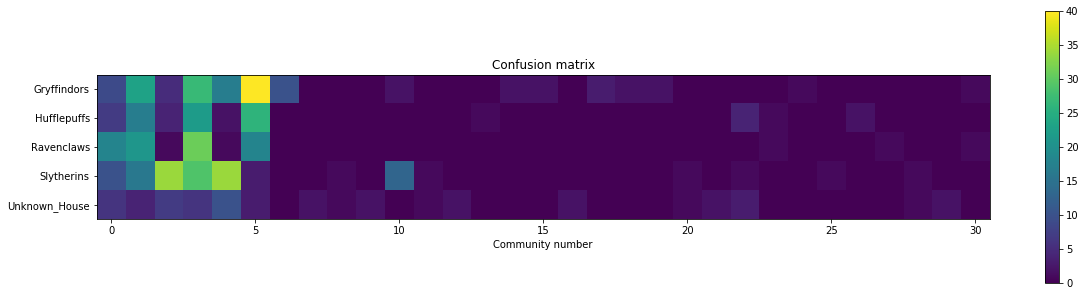

In [41]:
plt.figure(figsize=(20,5))
plt.imshow(D)
plt.xlabel('Community number')
plt.yticks(np.arange(B), list(node_dict.keys()))
plt.title('Confusion matrix')
plt.colorbar()

In [71]:
COMMUNITIES_TO_INVESTIGATE = 5
TOP5 = 10

for i in range(COMMUNITIES_TO_INVESTIGATE):
    print("============== Top {} highest degrees in community {} ============== ".format(TOP5, i))
    nodes = [k for k, v in partition.iteritems() if v == i]
    top_nodes = sorted(nodes, key=lambda x: G.degree(x), reverse=True)[:TOP5]
    for node in top_nodes:
        print('{:<25}  {:<25} Degree: {:<20}'.format(node, nd_G.nodes.data()[node]['house'], nd_G.degree[node]))

============== Top 10 highest degrees in community 0 ============== 
William Weasley            Gryffindors               Degree: 52                  
Charles Weasley            Gryffindors               Degree: 41                  
Jacob's sibling            Unknown_House             Degree: 44                  
Garrick Ollivander         Ravenclaws                Degree: 32                  
Merula Snyde               Slytherins                Degree: 25                  
Patricia Rakepick          Gryffindors               Degree: 26                  
Bloody Baron               Slytherins                Degree: 23                  
Jacob (Hogwarts student)   Unknown_House             Degree: 15                  
Xenophilius Lovegood       Ravenclaws                Degree: 15                  
Ben Copper                 Gryffindors               Degree: 14                  
============== Top 10 highest degrees in community 1 ============== 
Albus Dumbledore           Gryffindors    

### Preprocess wiki text

In [10]:
stopword_list = stopwords.words('english')
stopword_list = stopword_list + [sw.replace('\'', '') for sw in stopword_list]

def tokenize_document(file_name):
    # Load the file, parse it using mwparserfromhell, convert to lowercase, remove stopwords and punctuation
    with io.open(file_name, 'r', encoding='utf-8') as f:
        d = f.read()
        w = mwparserfromhell.parse(d)
        w = w.strip_code().lower()
        tokens = nltk.word_tokenize(w)
        tokens = [t for t in tokens if t not in stopword_list]
        tokens = [t for t in tokens if t not in string.punctuation+'=='+'\'s'+'``'+'\'\'']
        tokens = [t for t in tokens if t if t.isalpha()]
        tokens = [t for t in tokens if t if not len(t) == 1]
        return tokens

In [11]:
token_dict = {row[1].title: tokenize_document(format_filename(row[1].page_id)) for row in df.iterrows()}

## Sentiment analysis - on each house

In [22]:
word_list_df = pd.read_csv(os.path.join('data', 'sentiment-list.txt'),delimiter='\t', skiprows=3)
word_list_df.head()

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1,8.50,0.9313,3600,--,--,1728
1,happiness,2,8.44,0.9723,1853,2458,--,1230
2,love,3,8.42,1.1082,25,317,328,23
3,happy,4,8.30,0.9949,65,1372,1313,375
4,laughed,5,8.26,1.1572,3334,3542,--,2332


In [23]:
#Creating dictionary for all words and their happiness average.
happy_dict = {}
for idx, row in word_list_df.iterrows():
    happy_dict[row.word] = row.happiness_average

In [24]:
words = set(word_list_df.word)
mean_happniess = np.mean(word_list_df.happiness_average)

def calculate_sentiment(tokens):
    tsum = 0.
    count = 0.
    for t in tokens:
        if t in words:
            tsum += happy_dict[t]
            count += 1
    if tsum == 0:
        return mean_happniess
    return tsum/count

In [25]:
sentiment_dict = {k: calculate_sentiment(v) for k, v in token_dict.iteritems()}

In [26]:
def print_list(top, d):
    for t in top:
        print("{:<60}  {:<30}  {}".format(t, d[t], G.nodes.data()[t]['house']))

In [27]:
top = sorted(sentiment_dict.keys(), key = lambda x: sentiment_dict[x], reverse=True)[:10]
print("==================== Top 10 highest sentiment characters ====================")
print_list(top, sentiment_dict)

==================== Top 10 highest sentiment characters ====================
Hufflepuff boy that blames Harry Potter (I)                   6.41142857143                   Hufflepuffs
Slytherin student that blames Harry Potter (I)                6.3925                          Slytherins
Hufflepuff boy that blames Harry Potter (II)                  6.3925                          Hufflepuffs
Slytherin student that blames Harry Potter (II)               6.3925                          Slytherins
Oona Ballington                                               6.36                            Gryffindors
Filemina Alchin                                               6.2875                          Gryffindors
Unidentified Ravenclaw boy at Hogwarts                        6.275                           Ravenclaws
Jason Charmer                                                 6.2725                          Gryffindors
Mike Boon                                                     6.2725         

In [28]:
top = sorted(sentiment_dict.keys(), key = lambda x: sentiment_dict[x], reverse=False)[:10]
print("==================== Top 10 loweset sentiment characters ====================")
print_list(top, sentiment_dict)

==================== Top 10 loweset sentiment characters ====================
Unidentified Ravenclaw boy (III)                              4.53333333333                   Ravenclaws
Wilkes                                                        4.56240740741                   Slytherins
Unidentified Slytherin girl at the Battle of Hogwarts (III)   4.66181818182                   Slytherins
Unidentified Slytherin girl at the Battle of Hogwarts         4.76                            Slytherins
Unidentified Hogwarts Hufflepuff boy who carried a body during the Battle of Hogwarts  4.78                            Hufflepuffs
Summerby                                                      4.81448275862                   Hufflepuffs
Unidentified Hogwarts Ravenclaw boy who carried a body during the Battle of Hogwarts  4.89166666667                   Ravenclaws
Unidentified Dumbledore's Army male Ravenclaw member 1997-1998 (II)  4.97777777778                   Ravenclaws
Unidentified Ravenclaw b

Sentiment of characters with a degree higher than the median

In [30]:
high_degree_nodes = [x[0] for x in list(G.degree) if x[1] >= 10]
print("There are {} nodes with a degree higher than 10".format(len(high_degree_nodes)))

There are 167 nodes with a degree higher than 10


In [31]:
top = sorted(high_degree_nodes, key = lambda x: sentiment_dict[x], reverse=True)[:10]
print("==================== Top 10 highest sentiment characters ====================")
print_list(top, sentiment_dict)

==================== Top 10 highest sentiment characters ====================
Callidora Black                                               6.23807692308                   Slytherins
Rose Granger-Weasley                                          6.05560137457                   Gryffindors
Charis Black                                                  5.98390625                      Slytherins
Gemma Farley                                                  5.954                           Slytherins
Lily L. Potter                                                5.93527593819                   Gryffindors
Head of Ravenclaw House                                       5.88941176471                   Ravenclaws
Cedrella Black                                                5.87414893617                   Slytherins
Cygnus Black III                                              5.87379562044                   Slytherins
Fleamont Potter                                               5.86538461538     

In [32]:
top = sorted(high_degree_nodes, key = lambda x: sentiment_dict[x], reverse=False)[:10]
print("==================== Top 10 loweset sentiment characters ====================")
print_list(top, sentiment_dict)

==================== Top 10 loweset sentiment characters ====================
Wilkes                                                        4.56240740741                   Slytherins
Avery II                                                      5.01037414966                   Slytherins
Evan Rosier                                                   5.25461538462                   Slytherins
Lestrange                                                     5.25491525424                   Slytherins
Alastor Moody                                                 5.27381722781                   Unknown_House
Ismelda Murk                                                  5.27723684211                   Slytherins
Vincent Crabbe                                                5.28262135922                   Slytherins
Rodolphus Lestrange                                           5.29187633262                   Slytherins
Bellatrix Lestrange                                           5.30175709779    

In [36]:
house_sentiment_dict = {'Gryffindors' : [sentiment_dict[n] for n in node_dict['Gryffindors']],
             'Hufflepuffs' : [sentiment_dict[n] for n in node_dict['Hufflepuffs']],
            'Slytherins' : [sentiment_dict[n] for n in node_dict['Slytherins']],
             'Ravenclaws' : [sentiment_dict[n] for n in node_dict['Ravenclaws']],
             'Unknown_House' : [sentiment_dict[n] for n in node_dict['Unknown_House']]
}
mean_house_sentiment_dict = {k : np.mean(v) for k, v in house_sentiment_dict.iteritems()}

(5.4, 5.9)

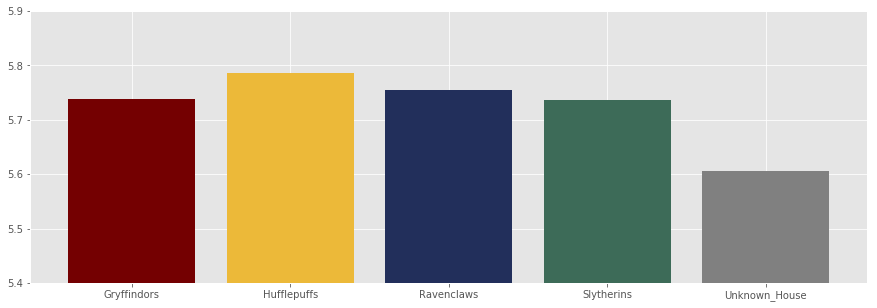

In [39]:
plt.figure(figsize=(15,5))
plt.bar(mean_house_sentiment_dict.keys(), mean_house_sentiment_dict.values(), color=color_list)
plt.ylim(5.4,5.9)

Text(0,0.5,'Count')

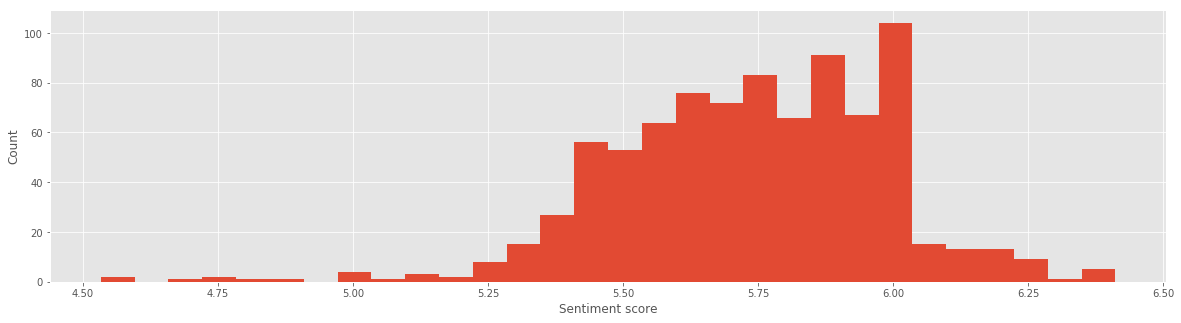

In [40]:
plt.figure(figsize=(20,5))
plt.hist(sentiment_dict.values(), bins=30)
plt.xlabel("Sentiment score")
plt.ylabel("Count")

Text(0,0.5,'Normalized count')

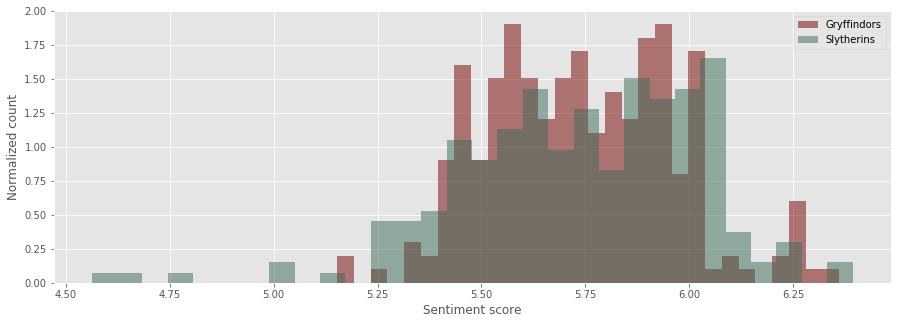

In [41]:
plt.figure(figsize=(15,5))
plt.hist(house_sentiment_dict['Gryffindors'], bins=30, alpha=0.5, color=house_color_dict['Gryffindors'], density=True)
plt.hist(house_sentiment_dict['Slytherins'], bins=30, alpha=0.5, color=house_color_dict['Slytherins'], density=True)
plt.xlabel("Sentiment score")
plt.legend({'Gryffindors' : house_color_dict['Gryffindors'],
            'Slytherins' : house_color_dict['Slytherins']})
plt.ylabel("Normalized count")

# Word clouds

In [26]:
house_word_dict = {house: [w for node in nodes for w in token_dict[node]] for house, nodes, in node_dict.iteritems()}
house_word_set_dict = {house: set(words) for house, words in house_word_dict.iteritems()}
houses = house_word_dict.keys()
no_documents = len(houses)

house_idf_dict = {}
house_tf_dict = {}
for house, words in house_word_set_dict.iteritems():
    house_idf_dict[house] = {}
    house_tf_dict[house] = nltk.FreqDist(house_word_set_dict[house])
    for word in words:
        ds_with_word = np.sum([word in ws for ws in house_word_set_dict.itervalues()])
        house_idf_dict[house][word] = no_documents / ds_with_word
        
house_tfidf_dict = {}
for house, words in house_word_set_dict.iteritems():
    house_tfidf_dict[house] = {w: house_idf_dict[house][w]*house_tf_dict[house][w] for w in house_word_set_dict[house]}

In [37]:
def draw_word_cloud(tfidf):
    word_list = [k for k, _, in tfidf.iteritems() for _ in range(int(np.ceil(tfidf[k])))]
    random.shuffle(word_list)
    wordcloud = WordCloud().generate(' '.join(word_list))
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')

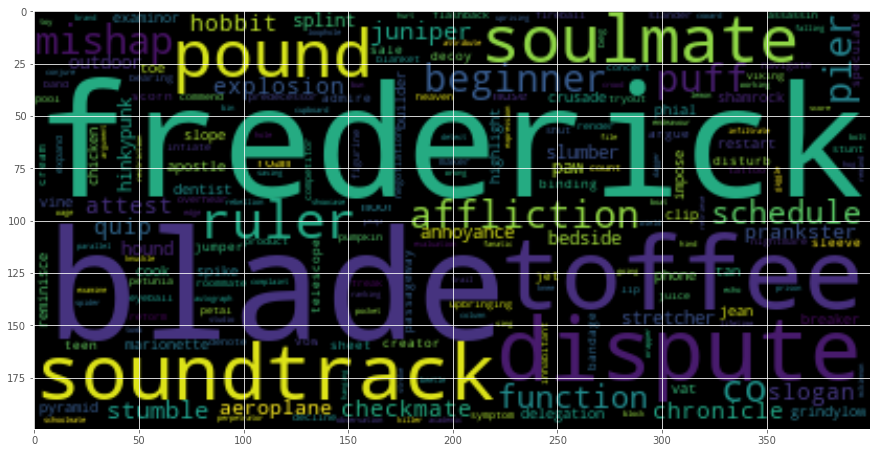

In [38]:
draw_word_cloud(house_tfidf_dict['Gryffindors'])

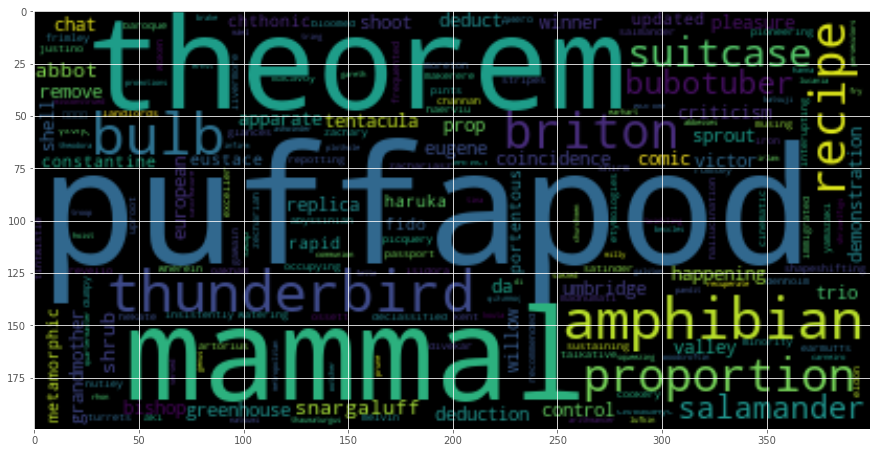

In [41]:
draw_word_cloud(house_tfidf_dict['Hufflepuffs'])

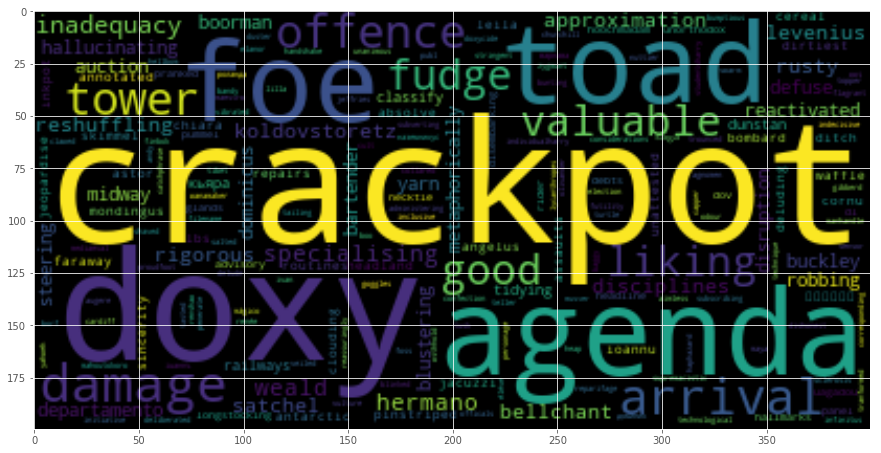

In [42]:
draw_word_cloud(house_tfidf_dict['Unknown_House'])

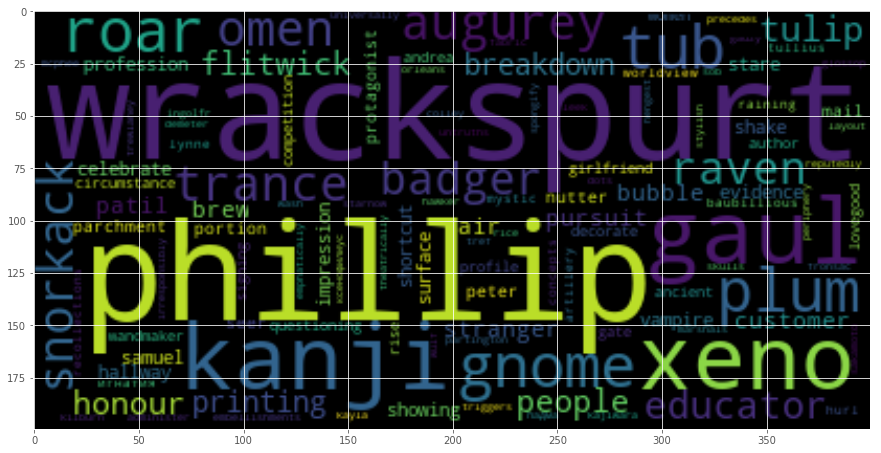

In [43]:
draw_word_cloud(house_tfidf_dict['Ravenclaws'])

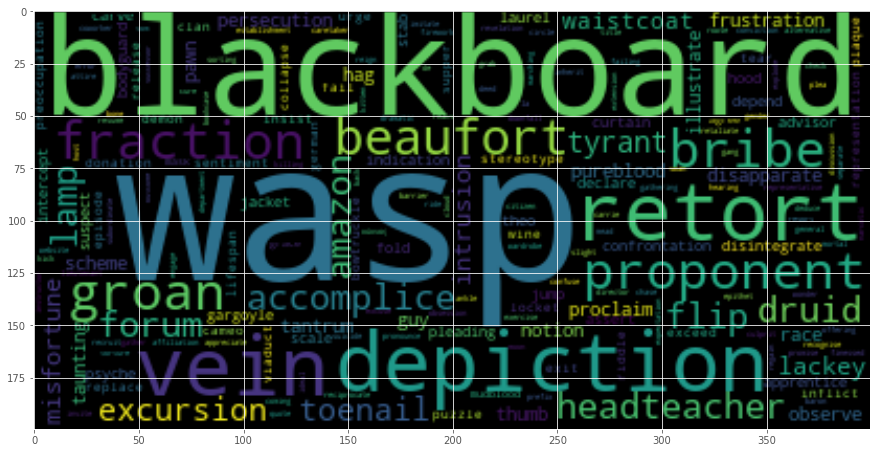

In [44]:
draw_word_cloud(house_tfidf_dict['Slytherins'])